<a href="https://colab.research.google.com/github/natrivera/tidytuesday/blob/main/2022/2022-05-17/tidy_tuesday_22_05_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
eurovision = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-17/eurovision.csv')
eurovision.head()

,event,host_city,year,host_country,event_url,section,artist,song,artist_url,image_url,artist_country,country_emoji,running_order,total_points,rank,rank_ordinal,qualified,winner
0,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,Kalush Orchestra,Stefania,https://eurovision.tv/participant/kalush-orche...,https://static.eurovision.tv/hb-cgi/images/963...,Ukraine,:flag_ua:,6.0,337.0,1.0,1st,True,False
1,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,S10,De Diepte,https://eurovision.tv/participant/s10-22,https://static.eurovision.tv/hb-cgi/images/963...,Netherlands,:flag_nl:,8.0,221.0,2.0,2nd,True,False
2,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,Amanda Georgiadi Tenfjord,Die Together,https://eurovision.tv/participant/amanda-georg...,https://static.eurovision.tv/hb-cgi/images/963...,Greece,:flag_gr:,15.0,211.0,3.0,3rd,True,False
3,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,MARO,"Saudade, Saudade",https://eurovision.tv/participant/maro-22,https://static.eurovision.tv/hb-cgi/images/963...,Portugal,:flag_pt:,10.0,208.0,4.0,4th,True,False
4,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,Intelligent Music Project,Intention,https://eurovision.tv/participant/intelligent-...,https://static.eurovision.tv/hb-cgi/images/963...,Bulgaria,:flag_bg:,7.0,29.0,16.0,16th,False,False


In [ ]:
eurovision.shape

(2005, 18)

In [ ]:
winners = eurovision[eurovision['winner'] == True]
winners.head()

,event,host_city,year,host_country,event_url,section,artist,song,artist_url,image_url,artist_country,country_emoji,running_order,total_points,rank,rank_ordinal,qualified,winner
40,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,grand-final,Kalush Orchestra,Stefania,https://eurovision.tv/participant/kalush-orche...,https://static.eurovision.tv/hb-cgi/images/963...,Ukraine,:flag_ua:,12.0,631.0,1.0,1st,False,True
93,Rotterdam 2021,Rotterdam,2021,Netherlands,https://eurovision.tv/event/rotterdam-2021,grand-final,Måneskin,Zitti E Buoni,https://eurovision.tv/participant/maneskin-2021,https://static.eurovision.tv/hb-cgi/images/92f...,Italy,:flag_it:,24.0,524.0,1.0,1st,False,True
212,Tel Aviv 2019,Tel Aviv,2019,Israel,https://eurovision.tv/event/tel-aviv-2019,grand-final,Duncan Laurence,Arcade,https://eurovision.tv/participant/duncan-laurence,https://static.eurovision.tv/hb-cgi/images/8d9...,Netherlands,:flag_nl:,12.0,498.0,1.0,1st,False,True
264,Lisbon 2018,Lisbon,2018,Portugal,https://eurovision.tv/event/lisbon-2018,grand-final,Netta,TOY,https://eurovision.tv/participant/netta-barzilai,https://static.eurovision.tv/hb-cgi/images/8d9...,Israel,:flag_il:,22.0,529.0,1.0,1st,False,True
335,Kyiv 2017,Kyiv,2017,Ukraine,https://eurovision.tv/event/kyiv-2017,grand-final,Salvador Sobral,Amar Pelos Dois,https://eurovision.tv/participant/salvador-sobral,https://static.eurovision.tv/hb-cgi/images/8d9...,Portugal,:flag_pt:,11.0,758.0,1.0,1st,False,True


In [ ]:
winners.shape

(289, 18)

In [ ]:
year_agg_df = eurovision.groupby(['year']).agg({"event": 'nunique', 
                                                "artist": 'nunique' ,  
                                                "song": 'nunique' , 
                                                "artist_country": 'nunique',
                                                'host_city':'count'})
year_agg_df

,event,artist,song,artist_country,host_city
year,,,,,
1956,1,12,14,7,14
1957,1,10,10,10,10
1958,1,10,10,10,10
1959,1,11,11,11,11
1960,1,13,13,13,13
...,...,...,...,...,...
2018,1,43,43,43,63
2019,1,41,41,41,61
2020,1,41,41,41,41


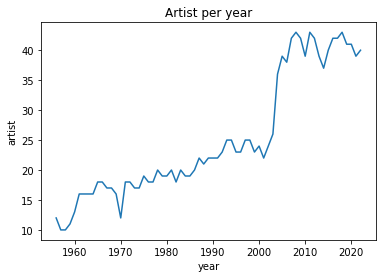

In [ ]:
sns.lineplot( data = year_agg_df , x = 'year' , y = 'artist' )
plt.title("Artist per year")
plt.show()

In [ ]:
df_2022 = eurovision[eurovision['year']==2022].reset_index()
df_2022

,index,event,host_city,year,host_country,event_url,section,artist,song,artist_url,image_url,artist_country,country_emoji,running_order,total_points,rank,rank_ordinal,qualified,winner
0,0,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,Kalush Orchestra,Stefania,https://eurovision.tv/participant/kalush-orche...,https://static.eurovision.tv/hb-cgi/images/963...,Ukraine,:flag_ua:,6.0,337.0,1.0,1st,True,False
1,1,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,S10,De Diepte,https://eurovision.tv/participant/s10-22,https://static.eurovision.tv/hb-cgi/images/963...,Netherlands,:flag_nl:,8.0,221.0,2.0,2nd,True,False
2,2,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,Amanda Georgiadi Tenfjord,Die Together,https://eurovision.tv/participant/amanda-georg...,https://static.eurovision.tv/hb-cgi/images/963...,Greece,:flag_gr:,15.0,211.0,3.0,3rd,True,False
3,3,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,MARO,"Saudade, Saudade",https://eurovision.tv/participant/maro-22,https://static.eurovision.tv/hb-cgi/images/963...,Portugal,:flag_pt:,10.0,208.0,4.0,4th,True,False
4,4,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,Intelligent Music Project,Intention,https://eurovision.tv/participant/intelligent-...,https://static.eurovision.tv/hb-cgi/images/963...,Bulgaria,:flag_bg:,7.0,29.0,16.0,16th,False,False
5,5,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,LPS,Disko,https://eurovision.tv/participant/lps-22,https://static.eurovision.tv/hb-cgi/images/963...,Slovenia,:flag_si:,5.0,15.0,17.0,17th,False,False
6,6,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,Rosa Linn,Snap,https://eurovision.tv/participant/rosa-linn-22,https://static.eurovision.tv/hb-cgi/images/963...,Armenia,:flag_am:,17.0,187.0,5.0,5th,True,False
7,7,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,Subwoolfer,Give That Wolf A Banana,https://eurovision.tv/participant/subwoolfer-22,https://static.eurovision.tv/hb-cgi/images/963...,Norway,:flag_no:,16.0,177.0,6.0,6th,True,False
8,8,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,Monika Liu,Sentimentai,https://eurovision.tv/participant/monika-liu-22,https://static.eurovision.tv/hb-cgi/images/963...,Lithuania,:flag_lt:,3.0,159.0,7.0,7th,True,False
9,9,Turin 2022,Turin,2022,Italy,https://eurovision.tv/event/turin-2022,first-semi-final,Zdob şi Zdub & Advahov Brothers,Trenulețul,https://eurovision.tv/participant/zdob-si-zdub...,https://static.eurovision.tv/hb-cgi/images/963...,Moldova,:flag_md:,9.0,154.0,8.0,8th,True,False


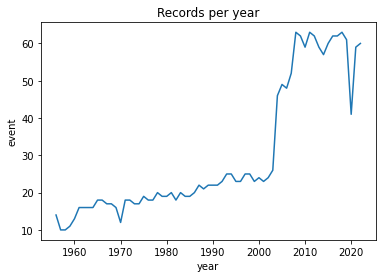

In [ ]:
year_agg = eurovision.groupby(['year']).agg('count')[['event'] ].reset_index()
sns.lineplot( data = year_agg , x = 'year' , y = 'event' )
plt.title("Records per year")
plt.show()

In [ ]:
len(pd.unique(eurovision.year))

67

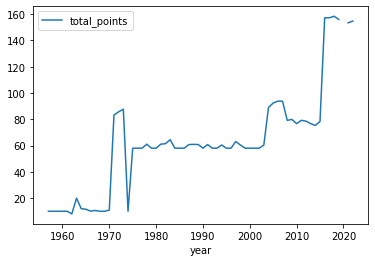

In [ ]:
avg_points_year = eurovision.groupby(['year']).agg('mean')[['total_points']].reset_index()
avg_points_year.plot('year' , 'total_points')

In [ ]:
avg_points_year.head()

,year,total_points
0,1956,NaN
1,1957,10.0
2,1958,10.0
3,1959,10.0
4,1960,10.0


In [ ]:
rolling_num = 5

country_year_avg_points = eurovision.groupby(['artist_country' , 'year' ]).agg('mean')[['total_points'] ].reset_index()


country_year_avg_points['avg_points__ma'] = country_year_avg_points.groupby('artist_country')['total_points'].transform(lambda x: x.rolling(rolling_num, 1).mean())



country_year_avg_points

,artist_country,year,total_points,avg_points__ma
0,Albania,2004,136.5,136.500
1,Albania,2005,53.0,94.750
2,Albania,2006,58.0,82.500
3,Albania,2007,49.0,74.125
4,Albania,2008,61.0,71.500
...,...,...,...,...
1673,Yugoslavia,1988,87.0,75.800
1674,Yugoslavia,1989,137.0,78.200
1675,Yugoslavia,1990,81.0,89.200
1676,Yugoslavia,1991,1.0,79.600


In [ ]:
country_yr_pivot = country_year_avg_points.pivot(index='artist_country', columns='year', values='total_points').reset_index()
country_yr_pivot

year,artist_country,1956,1957,1958,1959,1960,1961,1962,1963,1964,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.0,22.0,48.0,45.0,76.0,173.0,93.0,NaN,84.5,58.0
1,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.0,147.5,55.5,246.0,115.5,79.0,49.0,NaN,NaN,124.0
3,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,196.0,420.5,166.5,155.5,272.5,NaN,28.0,184.0
4,Austria,NaN,3.0,8.0,4.0,6.0,1.0,NaN,16.0,11.0,...,27.0,229.5,0.0,160.5,120.0,286.5,21.0,NaN,66.0,42.0
5,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,186.5,45.0,51.0,151.0,135.0,94.0,263.0,NaN,101.5,101.0
6,Belarus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56.0,65.0,39.0,84.0,96.5,65.0,76.5,NaN,NaN,NaN
7,Belgium,NaN,5.0,8.0,9.0,9.0,1.0,NaN,4.0,2.0,...,73.0,28.0,183.0,227.5,264.0,91.0,70.0,NaN,95.5,107.5
8,Bosnia & Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,104.0,NaN,NaN,NaN,NaN,NaN,NaN
9,Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.0,NaN,NaN,263.5,509.0,171.5,NaN,NaN,210.0,29.0


In [ ]:
len(pd.unique(country_year_avg_points.artist_country))

52

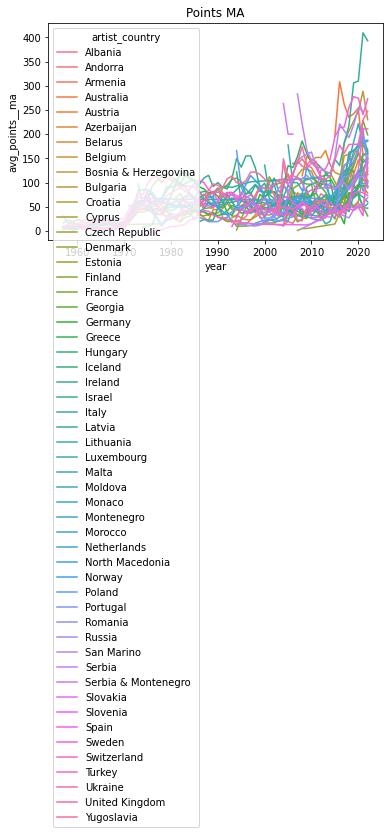

In [ ]:
sns.lineplot( data = country_year_avg_points , x = 'year' , y = 'avg_points__ma' , hue='artist_country' )
plt.title("Points MA")
plt.show()

Text(0.5, 0.98, "Rolling Mean Total Points per Year by Artist's Country")

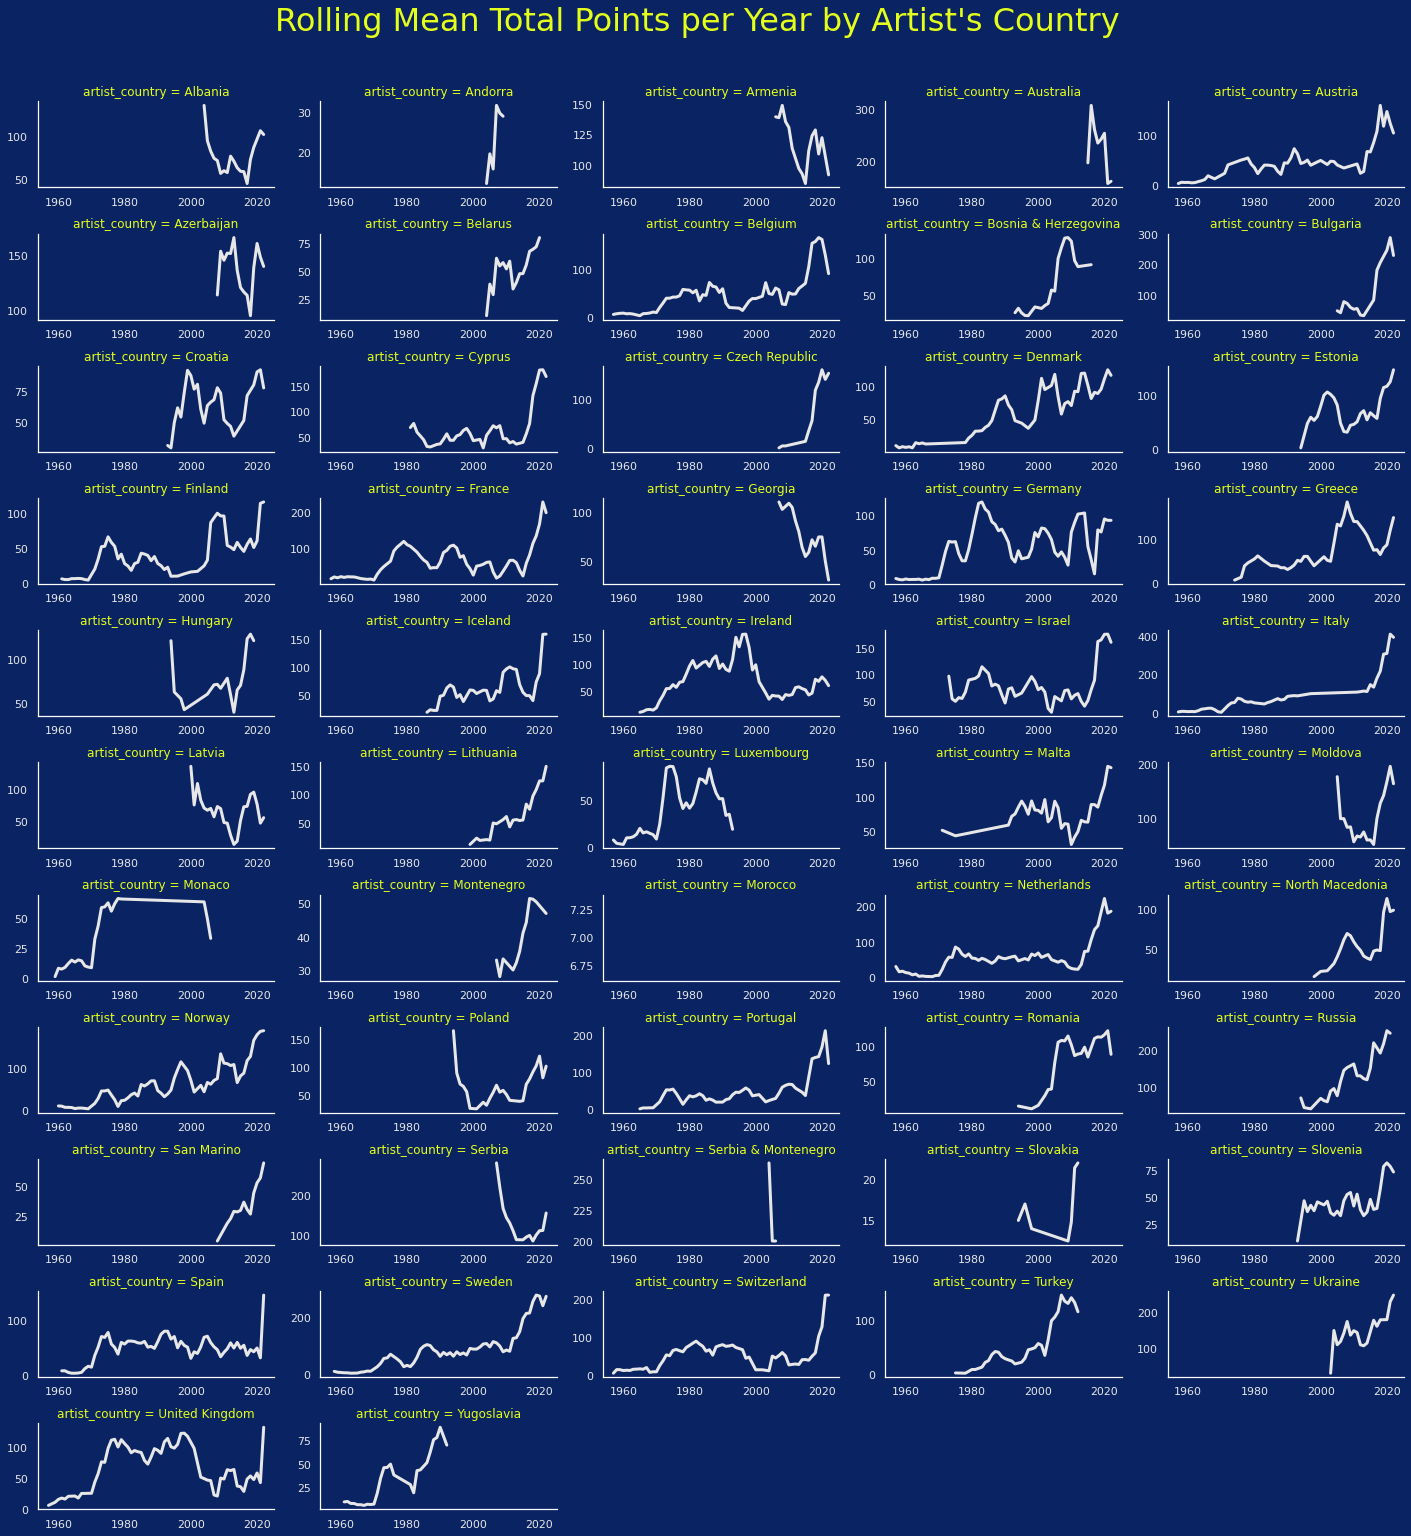

In [ ]:
# change seaborn figure settings
sns.set(rc={'axes.facecolor':'#0A2463', 'figure.facecolor':'#0A2463' , #'axes.labelcolor': '#1D8A99' , 
            'text.color':'#E4FF1A', 'axes.grid' : False , 'lines.linewidth': 3 })

# create a facet grid
g = sns.FacetGrid(country_year_avg_points, col="artist_country" , col_wrap=5, sharey=False , height=2, aspect=2)

# map lineplots to facets
g.map(sns.lineplot, "year", "avg_points__ma" , color='#E7E7E7')

# add x labels to all facets
for axis in g.axes.flat:
    axis.tick_params(labelbottom=True , labelcolor='#E7E7E7')


# remove x and y labels
g.set_axis_labels("", "")

g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Rolling Mean Total Points per Year by Artist's Country" , fontsize=32 )

In [ ]:
lue

In [ ]:
country_year_avg_points.groupby(['artist_country']).count().sort_values(by=['year'])

,year,total_points,avg_points__ma
artist_country,,,
Morocco,1,1,1
Serbia & Montenegro,3,2,3
Andorra,6,6,6
Slovakia,7,7,7
Australia,8,7,8
Czech Republic,11,9,11
Montenegro,12,12,12
San Marino,13,12,13
Armenia,15,14,15


In [ ]:
# load data
dat_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-05-17/eurovision.csv'
eurovision = pd.read_csv(dat_url)

# aggregate data by year and country and add a rolling average
country_year_avg_points = eurovision.groupby(['artist_country' , 'year' ]).agg('mean')[['total_points'] ].reset_index()
country_year_avg_points['avg_points__ma'] = country_year_avg_points.groupby('artist_country')['total_points'].transform(lambda x: x.rolling(rolling_num, 1).mean())

# change seaborn figure settings
sns.set(rc={'axes.facecolor':'#0A2463', 'figure.facecolor':'#0A2463' , #'axes.labelcolor': '#1D8A99' , 
            'text.color':'#E4FF1A', 'axes.grid' : False , 'lines.linewidth': 3 })

# create a facet grid
g = sns.FacetGrid(country_year_avg_points, col="artist_country" , col_wrap=5, sharey=False , height=2, aspect=2)

# map lineplots to facets
g.map(sns.lineplot, "year", "avg_points__ma" , color='#E7E7E7')

# add x labels to all facets
for axis in g.axes.flat:
    axis.tick_params(labelbottom=True , labelcolor='#E7E7E7')


# remove x and y labels
g.set_axis_labels("", "")

g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Rolling Mean Total Points per Year by Artist's Country" , fontsize=32 )